<a href="https://colab.research.google.com/github/zuzannazak/MgrSarcasm/blob/master/mgr_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC

import csv

In [2]:
sentences = []
labels = []

with open('/content/drive/MyDrive/STUDIA/train-balanced.csv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for row in reader:
        labels.append(row[0])
        sentences.append(row[1])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.1, random_state=1337)

In [4]:
vectorizer = CountVectorizer()
svm = LinearSVC()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
_ = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.67      0.71      0.69     56386
           1       0.69      0.65      0.67     56182

    accuracy                           0.68    112568
   macro avg       0.68      0.68      0.68    112568
weighted avg       0.68      0.68      0.68    112568



In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/STUDIA/train-balanced.csv', '\t', header=None, usecols=[0,1])
df.head()

,0,1
0,0,"Dang dog, thanks"
1,0,to summon the powers of the flying spaghetti m...
2,0,i did that 3rd last 1 by accident last night
3,0,"He's insane, used him in DC, better than Blake..."
4,0,"Forgot about him, he's a pretty pointless card..."


In [6]:
from io import StringIO
col = [0, 1]
df = df[col]
df = df[pd.notnull(df[1])]
df.columns = [0, 1]
df[0] = df[0].factorize()[0]
df.head()

,0,1
0,0,"Dang dog, thanks"
1,0,to summon the powers of the flying spaghetti m...
2,0,i did that 3rd last 1 by accident last night
3,0,"He's insane, used him in DC, better than Blake..."
4,0,"Forgot about him, he's a pretty pointless card..."


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(sentences)
labels = df[0]
features.shape
#Now, each of 1125678 sentences is represented by 139350 features, representing the tf-idf score for different unigrams and bigrams.


(1125678, 139350)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df[1], df[0], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df[1], df[0], random_state = 0)
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)
#clf = MultinomialNB().fit(X_train_tfidf, y_train)
_ = svm.fit(X_train_tfidf, y_train)
y_pred = svm.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


ValueError: ignored

In [18]:
type(X_train_tfidf)

sklearn.svm._classes.LinearSVC

In [9]:
print(clf.predict(count_vect.transform(["Yes, definitely"])))

[1]


In [10]:
print(clf.predict(count_vect.transform(["I like cats"])))

[0]


In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(random_state=0)
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


NameError: ignored

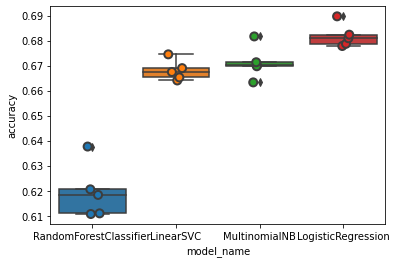

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()